In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Markdown

# 设置中文显示
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif'] = ['SimHei', 'WenQuanYi Micro Hei', 'Heiti TC']  # 使用多种中文字体
plt.rcParams['axes.unicode_minus'] = False
sns.set_style('whitegrid')

In [104]:
# 加载数据集
try:
    data = pd.read_csv('cleaned_data_V1.csv')
    print('数据基本信息：')
    data.info()
    
    # 查看列名
    column_names = data.columns
    print(f"数据集列名：{list(column_names)}")
    
except FileNotFoundError:
    print("错误：找不到数据集文件 'cleaned_data_V1.csv'")
except Exception as e:
    print(f"发生未知错误：{e}")

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fe               247 non-null    float64
 1   Co               247 non-null    float64
 2   Mn               247 non-null    float64
 3   Al               247 non-null    float64
 4   Ni               247 non-null    float64
 5   B                247 non-null    float64
 6   Hf               247 non-null    float64
 7   Si               247 non-null    float64
 8   Cu               247 non-null    float64
 9   P                247 non-null    float64
 10  Mo               247 non-null    float64
 11  Cr               247 non-null    float64
 12  La               247 non-null    float64
 13  Ti               247 non-null    float64
 14  Sn               247 non-null    float64
 15  V                247 non-null    float64
 16  Ga               247 non-null    float64
 17  Nb      

In [105]:
# 提取特征变量x和目标变量y（多目标）
x = data.drop(columns=['Ms', 'Hc', 'Ms_div30', 'Hc_log'])
y = data[['Ms_div30', 'Hc_log']]  # 变成包含两个目标变量的DataFrame

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

print(f"训练集样本数：{x_train.shape[0]}，特征数：{x_train.shape[1]}")
print(f"测试集样本数：{x_test.shape[0]}，特征数：{x_test.shape[1]}")

训练集样本数：49，特征数：31
测试集样本数：198，特征数：31


In [106]:
# 创建多输出GBDT回归模型并拟合数据
model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, random_state=42))

# 训练模型
model.fit(x_train, y_train)

print("模型训练完成！")

模型训练完成！


In [107]:
# 在训练集和测试集上进行预测
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# 分离两个目标变量的预测结果
y_train_pred_ms = y_train_pred[:, 0]
y_train_pred_hc = y_train_pred[:, 1]
y_test_pred_ms = y_test_pred[:, 0]
y_test_pred_hc = y_test_pred[:, 1]

# 计算训练集和测试集的均方误差（MSE）和决定系数（R²）
metrics = {}
for i, target in enumerate(['Ms_div30', 'Hc_log']):
    true_train = y_train.iloc[:, i]
    pred_train = y_train_pred[:, i]
    true_test = y_test.iloc[:, i]
    pred_test = y_test_pred[:, i]
    
    metrics[target] = {
        'train_mse': mean_squared_error(true_train, pred_train),
        'train_r2': r2_score(true_train, pred_train),
        'test_mse': mean_squared_error(true_test, pred_test),
        'test_r2': r2_score(true_test, pred_test)
    }

# 输出评估指标
display(Markdown("### 模型评估结果"))
metrics_df = pd.DataFrame({
    '目标变量': ['Ms_div30', 'Ms_div30', 'Hc_log', 'Hc_log'],
    '数据集': ['训练集', '测试集', '训练集', '测试集'],
    'MSE': [
        metrics['Ms_div30']['train_mse'], 
        metrics['Ms_div30']['test_mse'],
        metrics['Hc_log']['train_mse'], 
        metrics['Hc_log']['test_mse']
    ],
    'R²': [
        metrics['Ms_div30']['train_r2'], 
        metrics['Ms_div30']['test_r2'],
        metrics['Hc_log']['train_r2'], 
        metrics['Hc_log']['test_r2']
    ]
})

display(metrics_df.round(4))

### 模型评估结果

,目标变量,数据集,MSE,R²
0,Ms_div30,训练集,0.0087,0.9974
1,Ms_div30,测试集,1.0088,0.6617
2,Hc_log,训练集,0.0275,0.9957
3,Hc_log,测试集,3.6993,0.3436


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\1571820846.py:26: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\1571820846.py:26: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\1571820846.py:26: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\1571820846.py:26: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\1571820846.py:26: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\1571820846.py:26: UserWarni

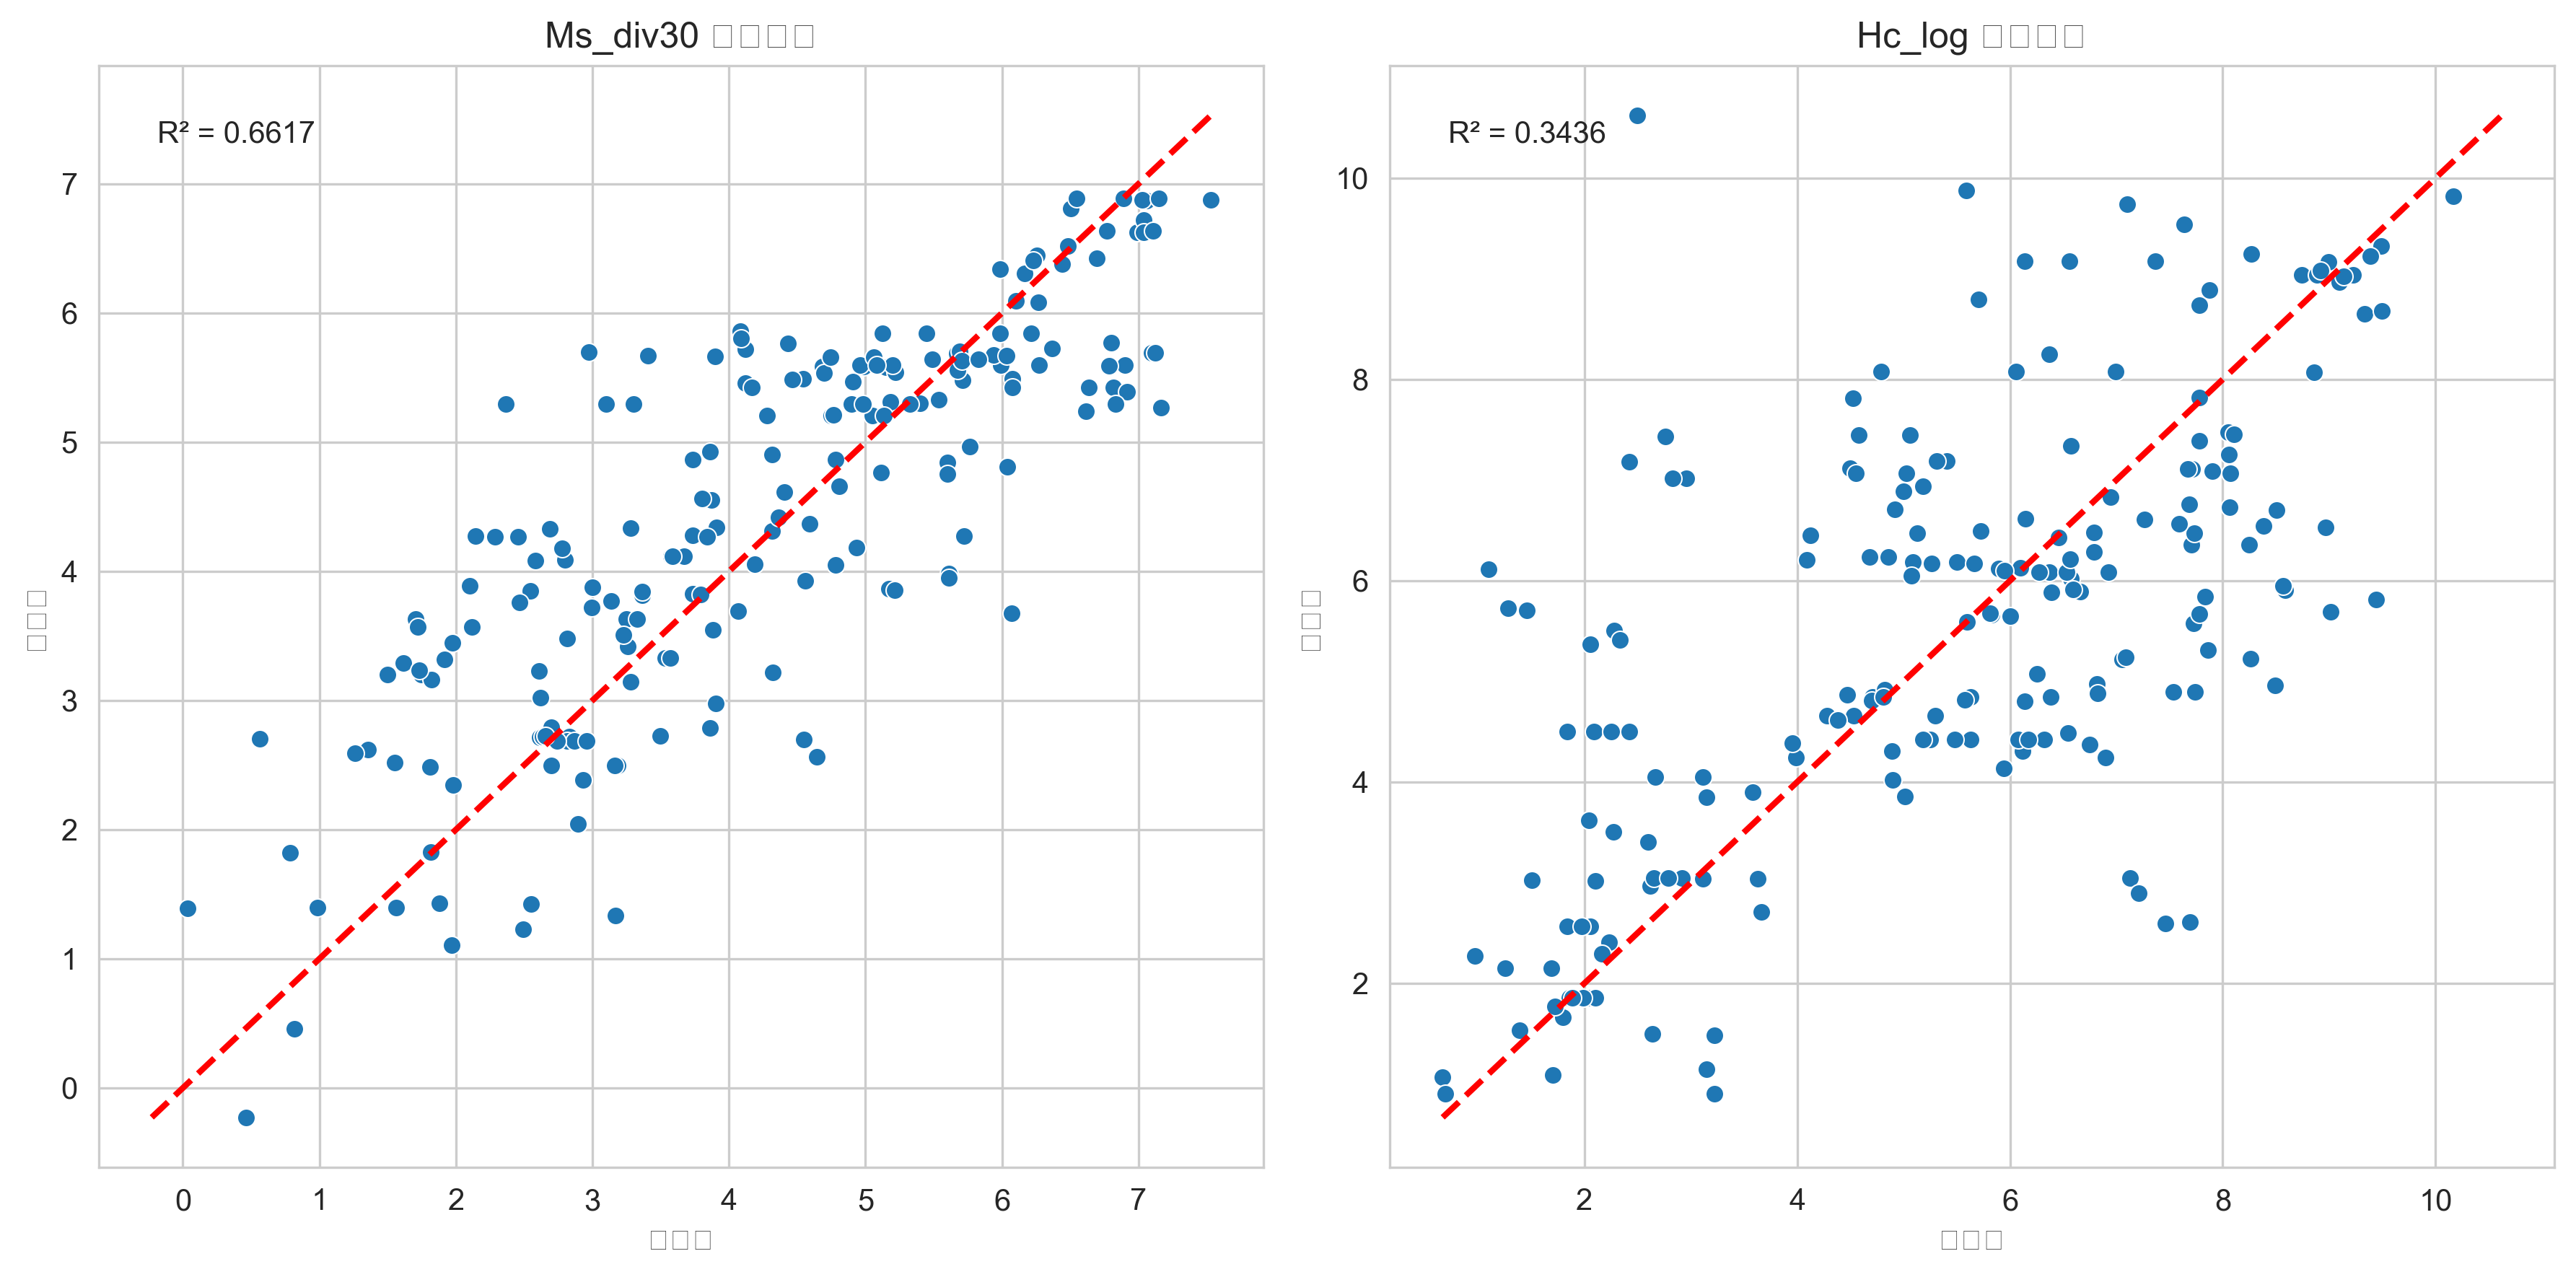

In [108]:
# 绘制预测结果散点图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ms预测结果
sns.scatterplot(x=y_test['Ms_div30'], y=y_test_pred_ms, ax=axes[0])
min_val = min(y_test['Ms_div30'].min(), y_test_pred_ms.min())
max_val = max(y_test['Ms_div30'].max(), y_test_pred_ms.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
axes[0].set_xlabel('真实值')
axes[0].set_ylabel('预测值')
axes[0].set_title('Ms_div30 预测结果')
axes[0].text(0.05, 0.95, f"R² = {metrics['Ms_div30']['test_r2']:.4f}", 
             transform=axes[0].transAxes, fontsize=10, verticalalignment='top')

# Hc预测结果
sns.scatterplot(x=y_test['Hc_log'], y=y_test_pred_hc, ax=axes[1])
min_val = min(y_test['Hc_log'].min(), y_test_pred_hc.min())
max_val = max(y_test['Hc_log'].max(), y_test_pred_hc.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
axes[1].set_xlabel('真实值')
axes[1].set_ylabel('预测值')
axes[1].set_title('Hc_log 预测结果')
axes[1].text(0.05, 0.95, f"R² = {metrics['Hc_log']['test_r2']:.4f}", 
             transform=axes[1].transAxes, fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\1818427813.py:20: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\1818427813.py:20: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\1818427813.py:20: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\1818427813.py:20: UserWarning: Glyph 27531 (\N{CJK UNIFIED IDEOGRAPH-6B8B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\1818427813.py:20: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\1818427813.py:20: UserWarni

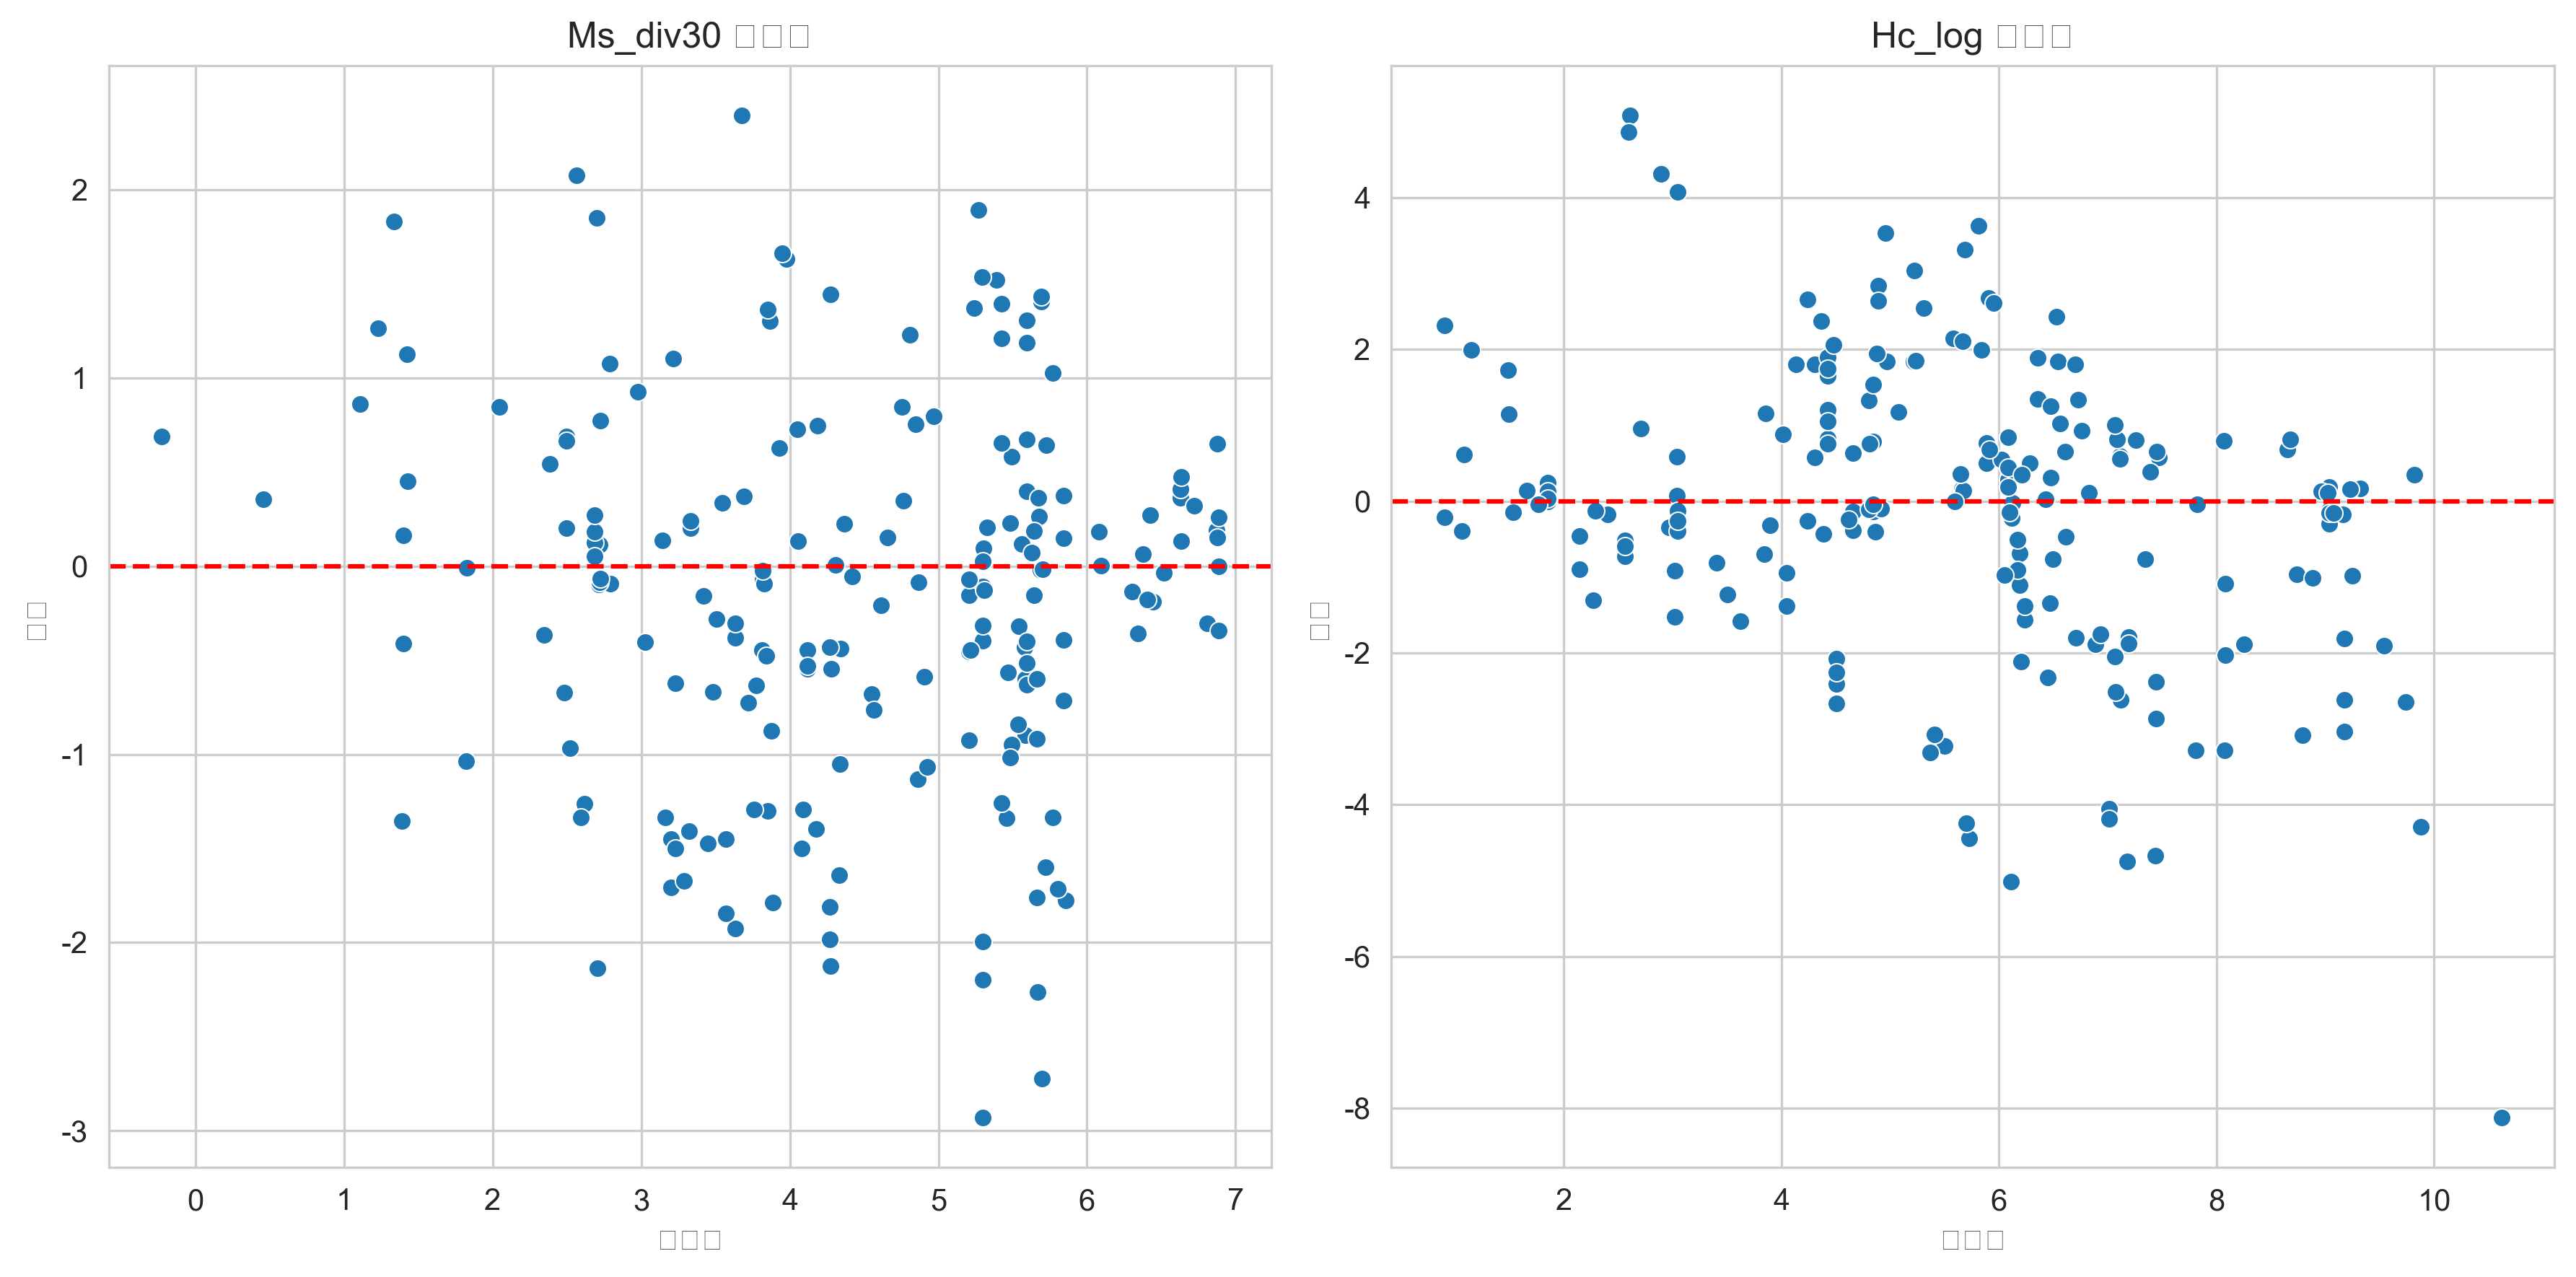

In [109]:
# 绘制残差图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ms残差图
residuals_ms = y_test['Ms_div30'] - y_test_pred_ms
sns.scatterplot(x=y_test_pred_ms, y=residuals_ms, ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('预测值')
axes[0].set_ylabel('残差')
axes[0].set_title('Ms_div30 残差图')

# Hc残差图
residuals_hc = y_test['Hc_log'] - y_test_pred_hc
sns.scatterplot(x=y_test_pred_hc, y=residuals_hc, ax=axes[1])
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('预测值')
axes[1].set_ylabel('残差')
axes[1].set_title('Hc_log 残差图')

plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\4040108642.py:33: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\4040108642.py:33: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\4040108642.py:33: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\4040108642.py:33: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\4040108642.py:33: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12828\4040108642.py:33: UserWarni

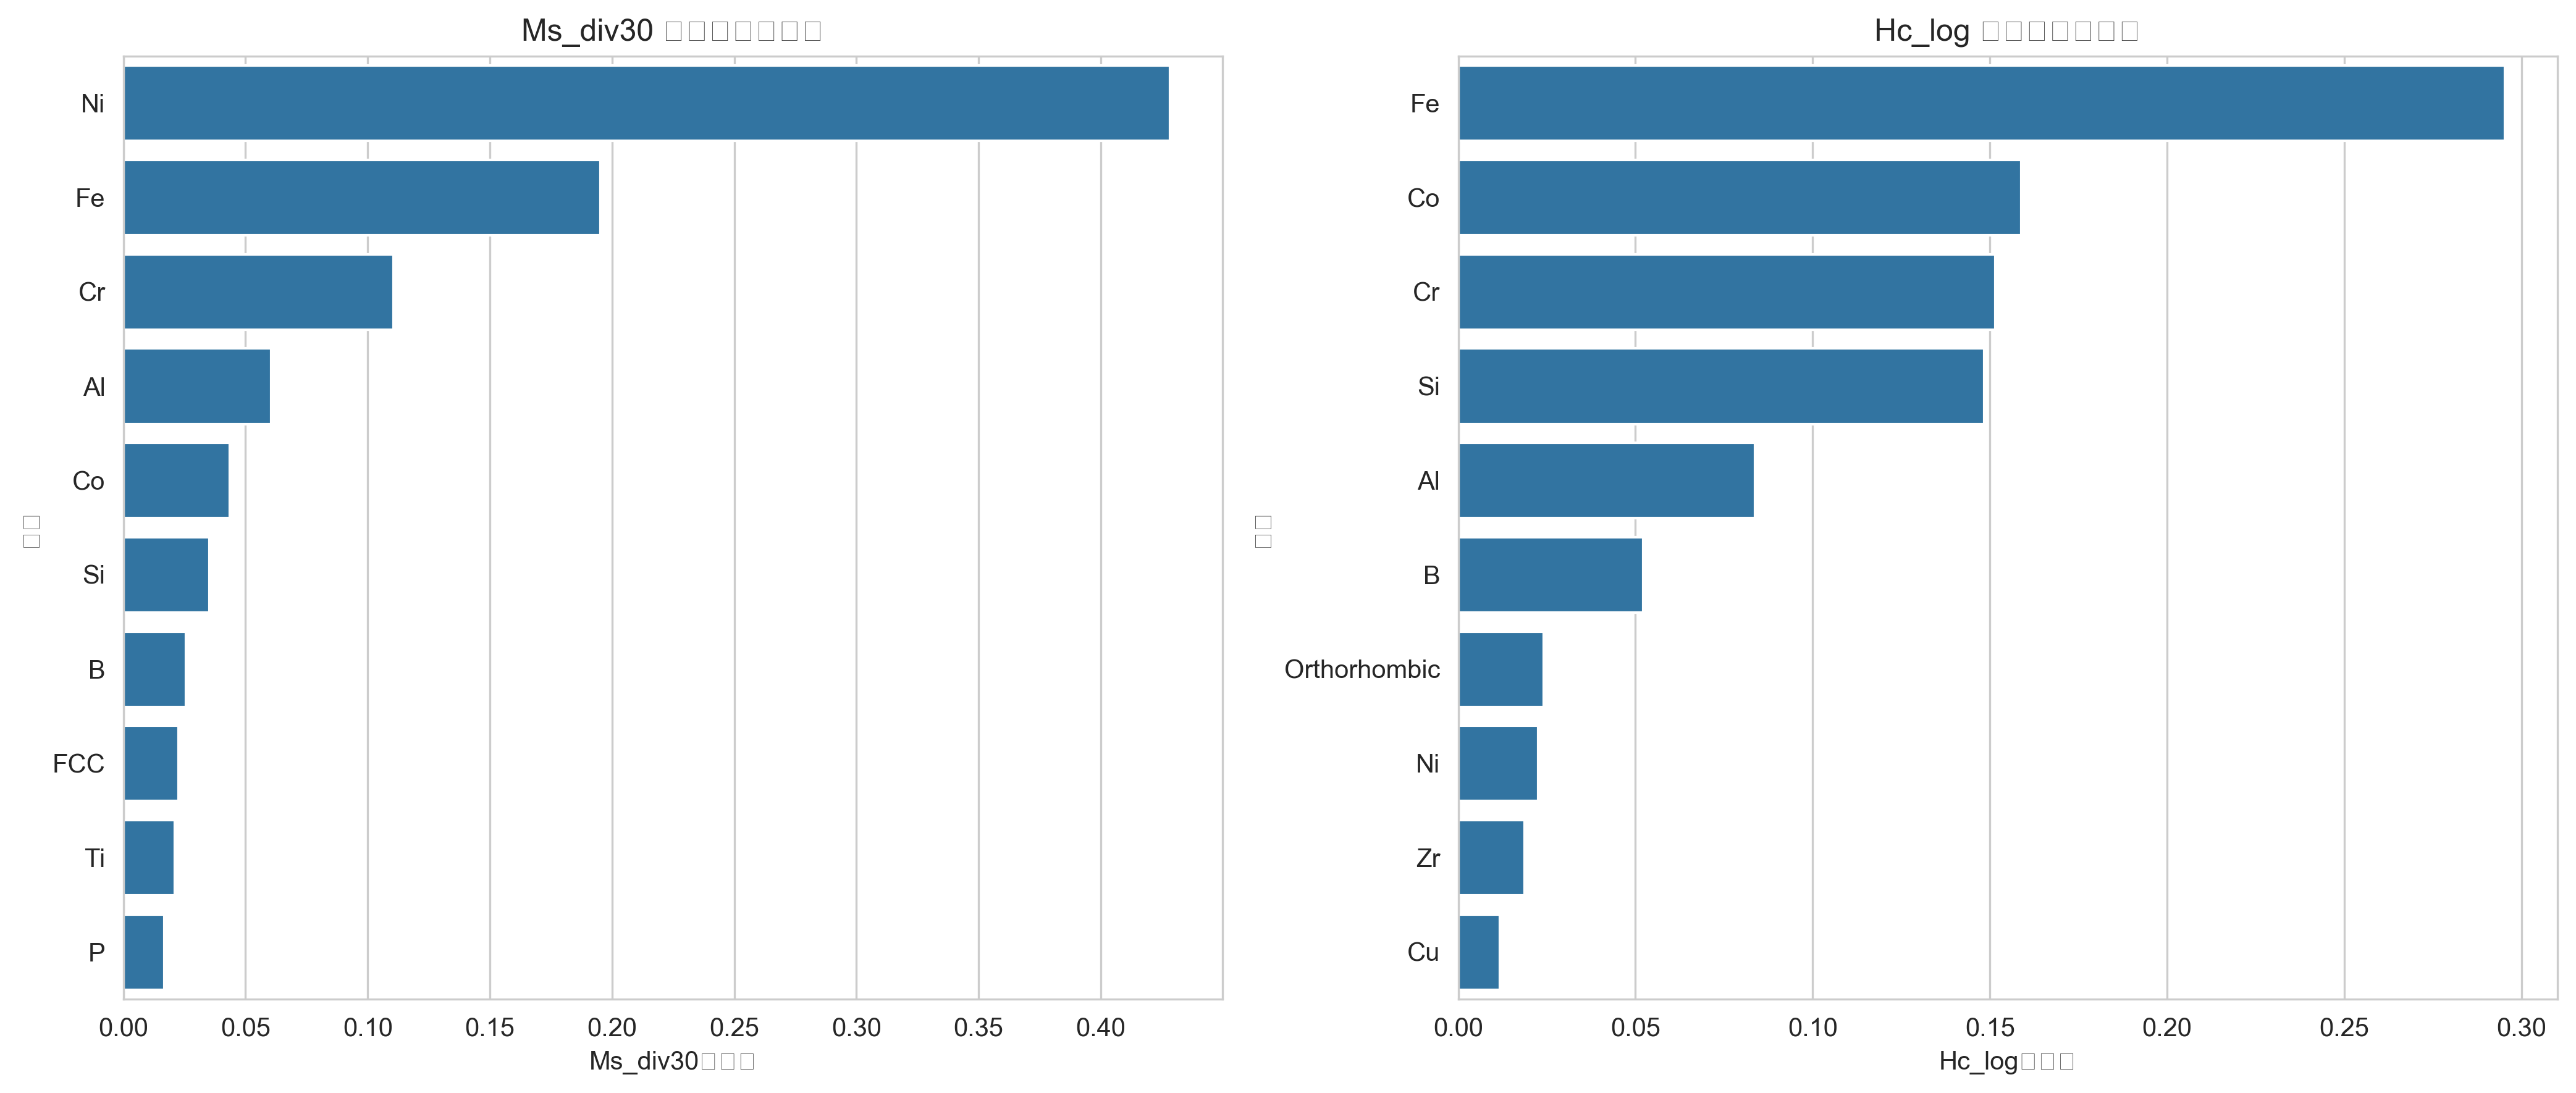

In [110]:
# 特征重要性分析
feature_columns = ['Fe', 'Co', 'Mn', 'Al', 'Ni', 'B', 'Hf', 'Si', 'Cu', 'P', 'Mo', 'Cr',
                   'La', 'Ti', 'Sn', 'V', 'Ga', 'Nb', 'Zr', 'C', 'Gd', 'Y', 'Ta', 'DO3',
                   'BCC', 'FCC', 'HCP', 'Orthorhombic', 'hexagonal', 'Tetragonal',
                   'Primitive Cubic']

# 获取特征重要性 (MultiOutputRegressor中每个目标的特征重要性)
importance_ms = model.estimators_[0].feature_importances_
importance_hc = model.estimators_[1].feature_importances_

# 创建特征重要性DataFrame
importance_df = pd.DataFrame({
    '特征': feature_columns,
    'Ms_div30重要性': importance_ms,
    'Hc_log重要性': importance_hc
})

# 按重要性排序
importance_df_ms = importance_df.sort_values('Ms_div30重要性', ascending=False)
importance_df_hc = importance_df.sort_values('Hc_log重要性', ascending=False)

# 绘制特征重要性图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Ms重要性
sns.barplot(x='Ms_div30重要性', y='特征', data=importance_df_ms.head(10), ax=axes[0])
axes[0].set_title('Ms_div30 特征重要性排名')

# Hc重要性
sns.barplot(x='Hc_log重要性', y='特征', data=importance_df_hc.head(10), ax=axes[1])
axes[1].set_title('Hc_log 特征重要性排名')

plt.tight_layout()
plt.show()

In [112]:
# 准备输入数据
TEST_data = {
    'Fe': [30],
    'Co': [0],
    'Mn': [0],
    'Al': [0],
    'Ni': [70],
    'B': [0],
    'Hf': [0],
    'Si': [0],
    'Cu': [0],
    'P': [0],
    'Mo': [0],
    'Cr': [0],
    'La': [0],
    'Ti': [0],
    'Sn': [0],
    'V': [0],
    'Ga': [0],
    'Nb': [0],
    'Zr': [0],
    'C': [0],
    'Gd': [0],
    'Y': [0],
    'Ta': [0],
    'DO3': [0],
    'BCC': [1],
    'FCC': [0],
    'HCP': [0],
    'Orthorhombic': [0],
    'hexagonal': [0],
    'Tetragonal': [0],
    'Primitive Cubic': [0],
}

# 将数据字典转换为DataFrame
input_df = pd.DataFrame(TEST_data)
input_df = input_df[feature_columns]  # 确保列顺序一致

# 使用模型进行预测
predicted_values = model.predict(input_df)
predicted_ms = predicted_values[0, 0] * 30
predicted_hc = np.exp(predicted_values[0, 1]) - 1

# 输出预测结果
display(Markdown("### 示例预测结果"))
print(f"预测 Ms: {predicted_ms:.4f} emu/g")
print(f"预测 Hc: {predicted_hc:.4f} A/m")    

### 示例预测结果

预测 Ms: 156.5803 emu/g
预测 Hc: 139.4365 A/m
